# This script contains the following:
- Import libraries
- Load datasets
- Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
- Compare customer profiles with regions and departments
- Order Frequency by Department
- Most ordered products in Produce department
- Export


# Import libraries

In [21]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


# Load datasets

In [22]:
# Define full absolute paths
path = r'/Users/macbook/Dropbox/Mac/Documents/Pro/Data Analyst/Course_Career foundry/A4_Python/2023.08_Instacart basket analysis/02_data/'
file_path = os.path.join(path, 'prepared data', 'all_data_above_5_orders_V3')

# Import the dataframe
df = pd.read_pickle(file_path)

In [23]:
# Checking loading
df.head()

,number_order_client,orders_day_of_week,order_hour_of_day,product_name,prices,busiest_period_of_day,loyalty_flag,spending_flag,frequency_flag,gender,state,age_group,income,income_category,region,department,has_pets,fam_status,family_type
0,1,2,8,Soda,9.0,Average orders,new customer,Low spender,Non-frequent customer,Female,Alabama,30-39,40423,Middle income,South,beverages,No,married,big family
1,2,3,7,Soda,9.0,Average orders,new customer,Low spender,Non-frequent customer,Female,Alabama,30-39,40423,Middle income,South,beverages,No,married,big family
2,3,3,12,Soda,9.0,Most orders,new customer,Low spender,Non-frequent customer,Female,Alabama,30-39,40423,Middle income,South,beverages,No,married,big family
3,4,4,7,Soda,9.0,Average orders,new customer,Low spender,Non-frequent customer,Female,Alabama,30-39,40423,Middle income,South,beverages,No,married,big family
4,5,4,15,Soda,9.0,Most orders,new customer,Low spender,Non-frequent customer,Female,Alabama,30-39,40423,Middle income,South,beverages,No,married,big family


In [24]:
df.columns


Index(['number_order_client', 'orders_day_of_week', 'order_hour_of_day',
       'product_name', 'prices', 'busiest_period_of_day', 'loyalty_flag',
       'spending_flag', 'frequency_flag', 'gender', 'state', 'age_group',
       'income', 'income_category', 'region', 'department', 'has_pets',
       'fam_status', 'family_type'],
      dtype='object')

# Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [25]:
# Group by customer profile (age, income, has_pets, family_type)
customer_profile_agg = df.groupby(['age_group', 'income_category', 'has_pets', 'family_type']) \
    .agg({
        'number_order_client': ['max', 'mean', 'min'],
        'prices': ['max', 'mean', 'min']
    }) \
    .reset_index()

# Rename the columns for clarity
customer_profile_agg.columns = ['age_group', 'income_category', 'has_pets', 'family_type',
                                'max_order_frequency', 'mean_order_frequency', 'min_order_frequency',
                                'max_expenditure', 'mean_expenditure', 'min_expenditure']



In [26]:
# Checking aggregation
customer_profile_agg

,age_group,income_category,has_pets,family_type,max_order_frequency,mean_order_frequency,min_order_frequency,max_expenditure,mean_expenditure,min_expenditure
0,18-29,High income,No,big family,99,17.807680,1,99999.0,21.293680,1.0
1,18-29,High income,No,single adult,99,17.249035,1,99999.0,20.514613,1.0
2,18-29,High income,No,small family,99,17.379884,1,99999.0,17.793068,1.0
3,18-29,High income,Yes,big family,95,13.278859,1,14.9,8.079507,1.1
4,18-29,High income,Yes,single adult,99,17.062560,1,14.9,8.495043,1.1
...,...,...,...,...,...,...,...,...,...,...
81,over 65,Middle income,No,single adult,99,15.689577,1,25.0,6.900229,1.0
82,over 65,Middle income,No,small family,99,16.751107,1,25.0,6.892977,1.0
83,over 65,Middle income,Yes,big family,91,14.517774,1,15.0,7.455951,1.1
84,over 65,Middle income,Yes,single adult,73,17.222435,1,14.9,7.728284,1.2


# Compare customer profiles with regions and departments

## Age by region

In [27]:
# Checking age by region stats

age_by_region = pd.crosstab(df['age_group'],df['region'], dropna = False)
age_by_region

region,Midwest,Northeast,South,West
age_group,,,,
18-29,1420593,1070367,2052384,1546493
30-39,1180333,888839,1722929,1281229
40-49,1226963,900134,1676841,1304823
50-65,1887381,1404110,2669444,2081728
over 65,1881483,1458814,2669199,2077888


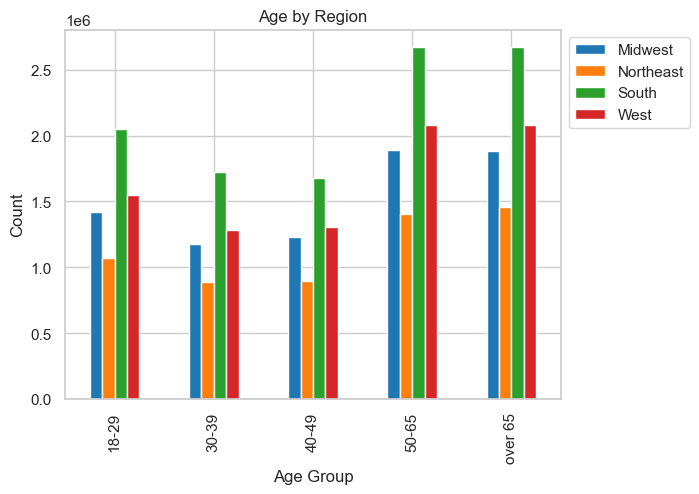

In [28]:
# Define custom colors for the bars
custom_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]

# Set the custom colors
sns.set_palette(custom_colors)

# Create the bar chart
age_region_bar = age_by_region.plot.bar()
plt.title("Age by Region")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


## Income by region

In [29]:
# defining a pivot table
income_by_region = pd.crosstab(df['income_category'],df['region'], dropna = False)

### Vizualisation of income per region - Heatmap

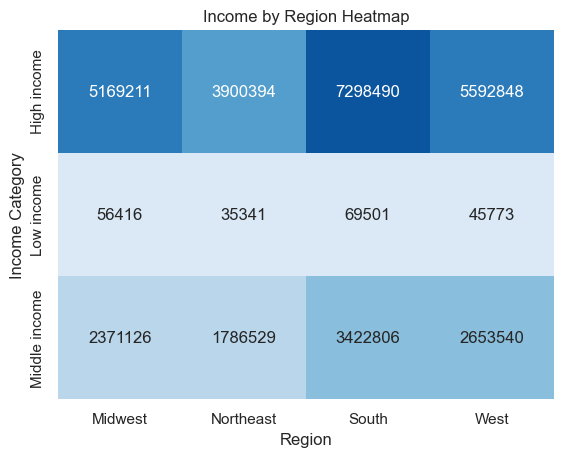

In [30]:
# Create a heatmap
sns.set(style="whitegrid")

# Customize the colormap (e.g., "Blues" for blue shades)
cmap = sns.color_palette("Blues")

# Create the heatmap
sns.heatmap(income_by_region, annot=True, fmt='d', cmap=cmap, cbar=False)

# Set labels and title
plt.xlabel("Region")
plt.ylabel("Income Category")
plt.title("Income by Region Heatmap")

# Show the plot
plt.show()


## Familiy type by region

In [31]:
# cross-tabulation between "family_type" and "region"
family_by_region = pd.crosstab(df['family_type'], df['region'], dropna=False)
family_by_region

region,Midwest,Northeast,South,West
family_type,,,,
big family,1874541,1444956,2706273,2108666
single adult,1905043,1418193,2701405,2072108
small family,3817169,2859115,5383119,4111387


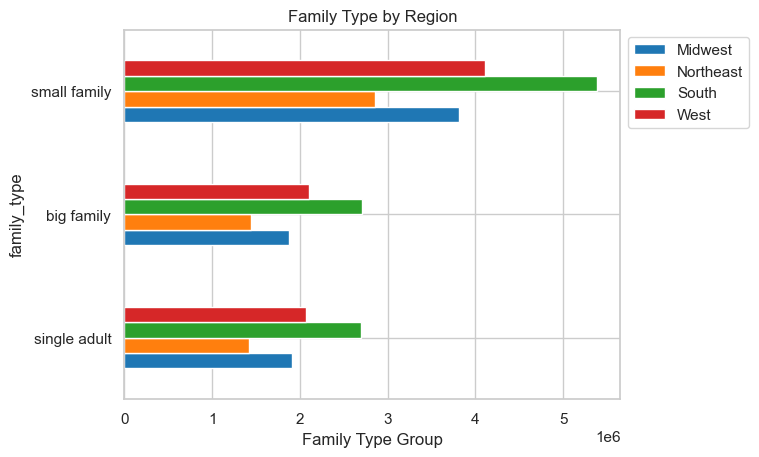

In [32]:
# defining variables
fam_by_region = family_by_region.sort_values(by=['West'], ascending=True).plot.barh(color = custom_colors)

# Create vizualisation
plt.title("Family Type by Region")
plt.xlabel("Family Type Group")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

### 0 = big family ; 1 = small family

## Department purchases by age

In [33]:
# cross-tabulation between department & age_group
dep_by_age = pd.crosstab(df['department'],df['age_group'], dropna = False)

In [34]:
# Checking cross tab
dep_by_age


age_group,18-29,30-39,40-49,50-65,over 65
department,,,,,
alcohol,29756,25112,23961,37879,36922
babies,80462,65908,69245,104955,103221
bakery,220349,183851,184516,292435,291208
beverages,499396,414509,425055,673359,675065
breakfast,134284,108938,111173,175032,173557
bulk,6606,5395,5580,8381,8608
canned goods,202931,166286,167473,265307,266016
dairy eggs,1017917,852038,854937,1327794,1345703
deli,197424,164559,165938,261144,262128


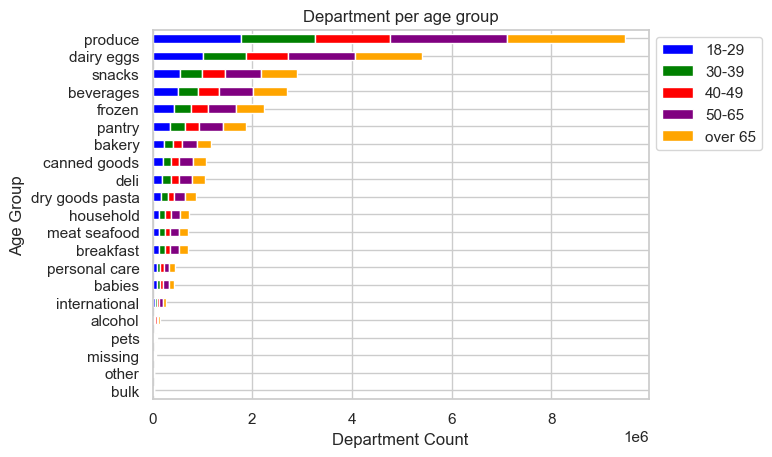

In [35]:
# Define colors for each age group
age_colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink']

# Sorting the DataFrame by a specific age group for ascending order, e.g., 'over 65'
age_group_to_sort = 'over 65'
dep_by_age_sorted = dep_by_age.sort_values(by=[age_group_to_sort], ascending=True)

# Create the horizontal stacked bar chart
dep_by_age_viz = dep_by_age_sorted.plot.barh(color=age_colors, stacked=True)
plt.title("Department per age group")
plt.xlabel("Department Count")
plt.ylabel("Age Group")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


# Order Frequency by Department

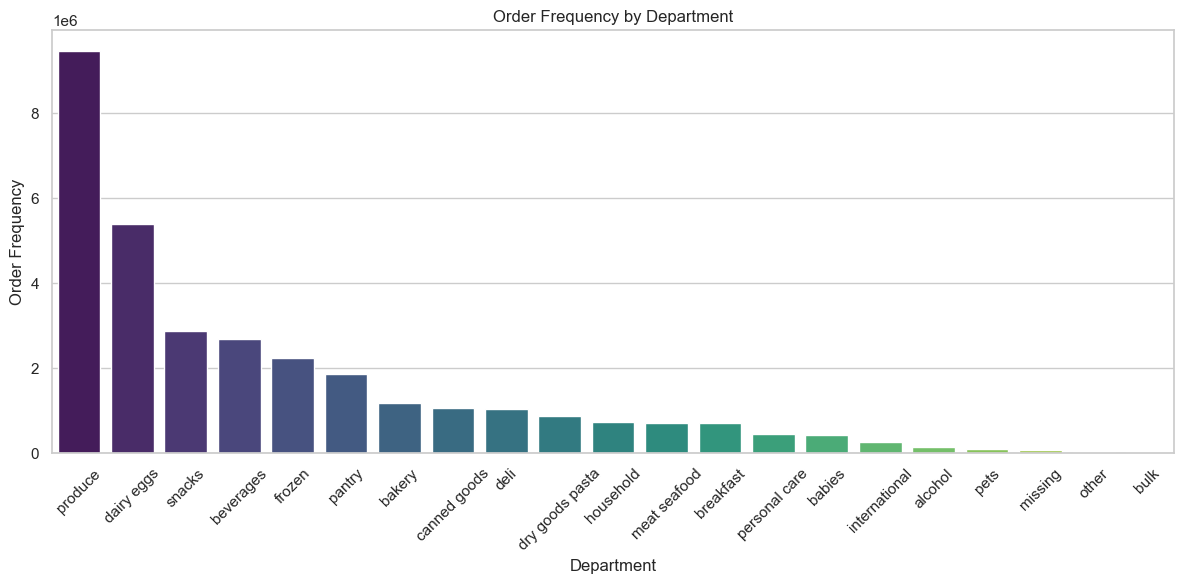

In [36]:
# Group by department and count the number of orders
department_order_counts = df['department'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.barplot(x=department_order_counts.index, y=department_order_counts.values, palette='viridis')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Department')
plt.ylabel('Order Frequency')
plt.title('Order Frequency by Department')
plt.tight_layout()
plt.show()


In [37]:
# Filter the DataFrame to select only the "product_name" department
produce_products = df[df['department'] == 'produce']

# Display the first few rows of the filtered DataFrame to inspect the products
produce_products.head(100)

,number_order_client,orders_day_of_week,order_hour_of_day,product_name,prices,busiest_period_of_day,loyalty_flag,spending_flag,frequency_flag,gender,state,age_group,income,income_category,region,department,has_pets,fam_status,family_type
11711549,2,3,7,Bag of Organic Bananas,10.3,Average orders,new customer,Low spender,Non-frequent customer,Female,Alabama,30-39,40423,Middle income,South,produce,No,married,big family
11711550,5,4,15,Bag of Organic Bananas,10.3,Most orders,new customer,Low spender,Non-frequent customer,Female,Alabama,30-39,40423,Middle income,South,produce,No,married,big family
11711551,5,4,15,Organic Fuji Apples,2.7,Most orders,new customer,Low spender,Non-frequent customer,Female,Alabama,30-39,40423,Middle income,South,produce,No,married,big family
11711552,5,4,15,Honeycrisp Apples,14.0,Most orders,new customer,Low spender,Non-frequent customer,Female,Alabama,30-39,40423,Middle income,South,produce,No,married,big family
11711553,5,4,15,Bartlett Pears,5.0,Most orders,new customer,Low spender,Non-frequent customer,Female,Alabama,30-39,40423,Middle income,South,produce,No,married,big family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11711644,20,1,13,Bartlett Pears,5.0,Most orders,regular customer,Low spender,Frequent customer,Female,Alabama,50-65,40974,Middle income,South,produce,No,married,small family
11711645,27,1,8,Organic Baby Carrots,11.8,Average orders,regular customer,Low spender,Frequent customer,Female,Alabama,50-65,40974,Middle income,South,produce,No,married,small family
11711646,27,1,8,Organic Blackberries,12.2,Average orders,regular customer,Low spender,Frequent customer,Female,Alabama,50-65,40974,Middle income,South,produce,No,married,small family
11711647,26,5,13,Raspberries,1.4,Most orders,regular customer,Low spender,Frequent customer,Female,Alabama,50-65,40974,Middle income,South,produce,No,married,small family


# Most ordered products in Produce department

In [38]:
# Group by 'product_name' and sum the quantities ordered
produce_order_counts = produce_products.groupby('product_name')['number_order_client'].sum()

# Sort the products by order quantity in descending order
top_10_produce_products = produce_order_counts.sort_values(ascending=False).head(10)

# Print the top 10 products
print("Top 10 products ordered from 'Produce' department:")
print(top_10_produce_products)


Top 10 products ordered from 'Produce' department:
product_name
Banana                    8143961
Bag of Organic Bananas    7764689
Organic Strawberries      4663358
Organic Baby Spinach      4241086
Organic Hass Avocado      4147882
Organic Raspberries       2993987
Organic Avocado           2730801
Large Lemon               2728925
Strawberries              2530749
Limes                     2432971
Name: number_order_client, dtype: int64


In [39]:
# Group by department and count the number of orders
produce_order_counts = produce_products.value_counts()

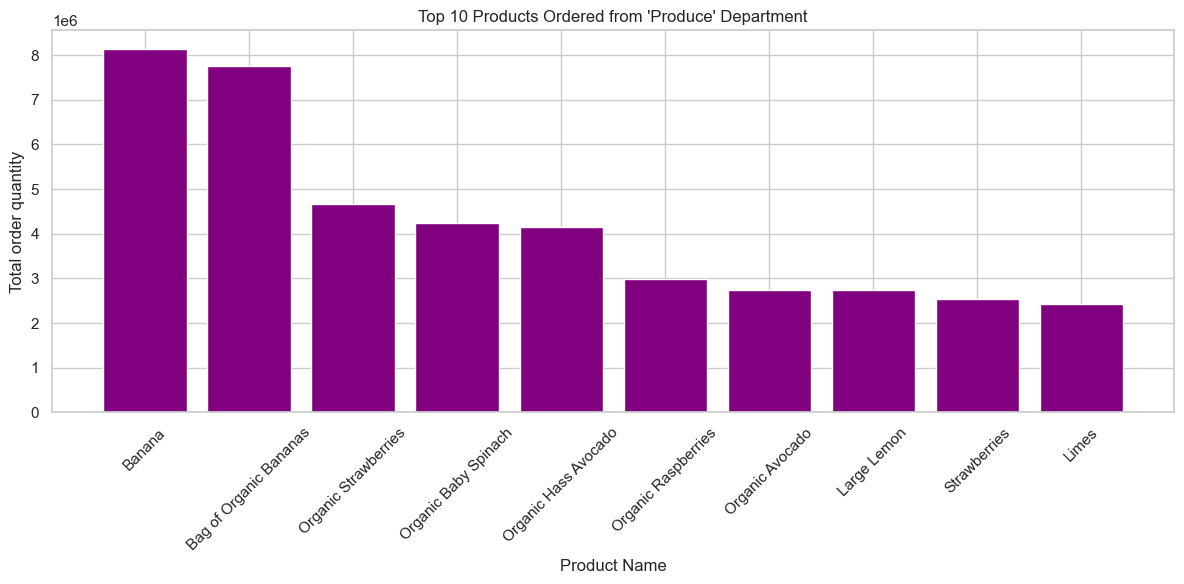

In [40]:
# Plot the top 10 products
plt.figure(figsize=(12, 6))
plt.bar(top_10_produce_products.index, top_10_produce_products.values, color='purple')
plt.title("Top 10 Products Ordered from 'Produce' Department")
plt.xlabel('Product Name')
plt.ylabel('Total order quantity')
plt.xticks(rotation=45)  
plt.tight_layout()

# Export

In [42]:
# Export in pickel
df.to_pickle(os.path.join(path,'prepared data','all_data_above_5_orders_V4'))